In [1]:
dofile './provider.lua'

m = require 'manifold';

In [2]:
provider = torch.load('provider.t7')

In [3]:
provider.trainData.data = provider.trainData.data:float()
provider.valData.data = provider.valData.data:float()

In [4]:
trainData = provider.trainData

In [5]:
trainData

{
  data : FloatTensor - size: 4000x3x96x96
  std_u : 13.766151323321
  mean_u : -3.9272570412993
  labels : FloatTensor - size: 4000
  size : function: 0x4084f460
  mean_v : 1.8419336072631
  std_v : 16.746470205287
}


In [6]:
indices = torch.randperm(provider.trainData.data:size(1))
indices = indices:long()

In [7]:
trainData.labels = trainData.labels:index(1, indices)
trainData.data = trainData.data:index(1, indices)

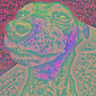

In [8]:
itorch.image(trainData.data[3])

In [9]:
x = torch.DoubleTensor(trainData.data:size()):copy(trainData.data)

In [10]:
x:size()

 4000
    3
   96
   96
[torch.LongStorage of size 4]



In [11]:
labels = trainData.labels

In [12]:
labels:size()

 4000
[torch.LongStorage of size 1]



In [13]:
X = x[{{1,100}}]
y = labels[{{1,100}}]

In [14]:
X:resize(X:size(1), X:size(2) * X:size(3) * X:size(4));

In [15]:
X:size(),y:size()

   100
 27648
[torch.LongStorage of size 2]

 100
[torch.LongStorage of size 1]



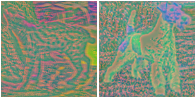

In [16]:
require 'cunn'
require 'nn'
model_path = "/home/ubuntu/ajr619/ds-ga-1008-a2/logs_default/vgg/model.net0.715"
model = torch.load(model_path)
input = trainData.data[{{1,2},{},{},{}}]
itorch.image(input)
input = input:cuda()

In [17]:
pred = model:forward(input)

In [18]:
print(pred)

-2.3111  2.6646 -3.0051  8.5519  2.6676 -0.7073 -5.3880  0.8551 -0.5366 -2.8706
-3.5543 -2.0088 -4.8903  1.9660  2.6012  9.7598  2.2538  2.5216 -3.9705 -4.6423
[torch.CudaTensor of size 2x10]



In [23]:
trainData.labels[2]

6	


In [ ]:
opts = {ndims = 2, perplexity = 30, pca = 50, use_bh = true, theta=0.5}

In [ ]:
m = require 'manifold';

In [ ]:
mapped_x1 = m.embedding.tsne(X, opts)

In [ ]:
x:size(1)

In [ ]:
im_size=4096

In [ ]:
--x:resize(x:size(1), 3,96,96):size()
x:size()

In [ ]:
map_im = m.draw_image_map(mapped_x1, x[{{1,1000},{},{},{}}], im_size, 0, true)

In [ ]:
itorch.image(map_im)